# Settings

In [6]:
%load_ext autoreload
%autoreload 2
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# add parent_path to path for imports
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
if not os.getcwd().endswith("kit_d-fine_sports-analytics"):
    os.chdir("..")

In [10]:
import matplotlib
import src
from src import config
from src.models import ball_gain_prediction
from src.utils import db_handler, utils
from src.models.ball_gain_prediction import *
import sklearn
import shap
target_set_outer_lanes = "target_dataset_shift_2sec_hypothesis_testing_outer_lanes"
df_target_outer_lanes = db_handler.get_table(target_set_outer_lanes)
target_set_middle_lane = "target_dataset_shift_2sec_hypothesis_testing_middle_lane"
df_target_middle_lane = db_handler.get_table(target_set_middle_lane)

# 2 Seconds Target Prediction (Hypo-Test) Middle Lane

Here the optimized parameters are used. Only the features at the time of prediction are used (Shift-0 features), as well as the value of the nearest player to the ball (1 Attacker, 1 Defender). Due to the high correlation between lanes/thirds and centroids, the centroids are removed (due to worse interpretability).

In [13]:
final_features= ['match_id',
 'half',
 'frame',
 'target',
 'distance_to_the_ball_shift_0_sec_1_attackers',
 'distance_to_the_ball_shift_0_sec_1_defenders',
 'numerical_superiority_20m_fromball_shift_0_sec_defending_team',
 'numerical_superiority_10m_fromball_shift_0_sec_defending_team',
 'number_defenders_20m_fromball_shift_0_sec_defending_team',
 'number_defenders_10m_fromball_shift_0_sec_defending_team',
 'number_defenders_own_final_third_shift_0_sec_defending_team',
 'number_defenders_15m_lastdefender_shift_0_sec_defending_team',
 'velocity_shift_0_sec_1_attackers',
 'surface_area_shift_0_sec_attacking_team',
 'spread_team_shift_0_sec_defending_team',
 'dis_def_att_defending_team_shift_0_sec_defending_team',
 'defensive_pressure_shift_0_sec_1_attackers',
 'distance_to_the_ball_average_3_sec_1_attackers',
 'distance_to_the_ball_average_3_sec_1_defenders']
print(len(final_features))
final_features

19


['match_id',
 'half',
 'frame',
 'target',
 'distance_to_the_ball_shift_0_sec_1_attackers',
 'distance_to_the_ball_shift_0_sec_1_defenders',
 'numerical_superiority_20m_fromball_shift_0_sec_defending_team',
 'numerical_superiority_10m_fromball_shift_0_sec_defending_team',
 'number_defenders_20m_fromball_shift_0_sec_defending_team',
 'number_defenders_10m_fromball_shift_0_sec_defending_team',
 'number_defenders_own_final_third_shift_0_sec_defending_team',
 'number_defenders_15m_lastdefender_shift_0_sec_defending_team',
 'velocity_shift_0_sec_1_attackers',
 'surface_area_shift_0_sec_attacking_team',
 'spread_team_shift_0_sec_defending_team',
 'dis_def_att_defending_team_shift_0_sec_defending_team',
 'defensive_pressure_shift_0_sec_1_attackers',
 'distance_to_the_ball_average_3_sec_1_attackers',
 'distance_to_the_ball_average_3_sec_1_defenders']

In [15]:
# the params were optimized by hyperparameter finder
# these params proved to be efficient on all datasets (which are very similar) and are not changed for consistency
corr_threshold = 1
use_f_score=True
classifier = "RandomForest"
inv_training_test=True
use_stored_k_best = False
params = {'max_features': 'sqrt', 
          'max_depth': 20, 
          'min_samples_split': 10, 
          'min_samples_leaf': 10, 
          'class_weight': 'balanced', 
          'n_estimators': 250, 
          'bootstrap': False}
target_data_columns = final_features
final_df_target_middle_lane = df_target_middle_lane[target_data_columns]


Predicting with RandomForest and params {'max_features': 'sqrt', 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 10, 'class_weight': 'balanced', 'n_estimators': 250, 'bootstrap': False}
Training matches are: 003C2T, 003C2U, 003C2V, 003C2W, 003C2X, 003C2Y, 003C2Z, 003C30, 003C31, 003C32, 003C33, 003C34, 003C35, 003C36, 003C37, 003C38, 003C3A, 003C3D, 003C3E, 003C3F, 003C3G, 003C3H, 003C3I, 003C3K, 003C3M, 003C3N, 003C3O, 003C3P, 003C3R, 003C3S, 003C3T, 003C3U, 003C3V, 003C3W, 003C3X, 003C3Y, 003C40, 003C41, 003C42, 003C43, 003C44, 003C45, 003C46, 003C47, 003C48, 003C4A, 003C4B, 003C4C, 003C4D, 003C4E, 003C4F, 003C4G, 003C4H, 003C4I, 003C4J, 003C4L, 003C4M, 003C4N, 003C4O, 003C4P, 003C4Q, 003C4R, 003C4S, 003C4T, 003C4U, 003C4V, 003C4W, 003C4X, 003C4Y, 003C4Z, 003C50, 003C51, 003C52, 003C53, 003C54, 003C55, 003C57, 003C59, 003C5A
Validation matches are: 003C5C, 003C5D, 003C5F, 003C5G, 003C5I, 003C5J, 003C5K, 003C5L, 003C5M, 003C5N, 003C5Q, 003C5R, 003C5S, 003C5T, 003C5U, 003

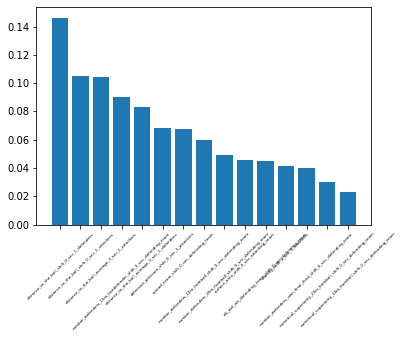

distance_to_the_ball_shift_0_sec_1_defenders                     0.146397
distance_to_the_ball_shift_0_sec_1_attackers                     0.105276
distance_to_the_ball_average_3_sec_1_attackers                   0.104483
number_defenders_15m_lastdefender_shift_0_sec_defending_team     0.090477
distance_to_the_ball_average_3_sec_1_defenders                   0.083298
defensive_pressure_shift_0_sec_1_attackers                       0.068562
spread_team_shift_0_sec_defending_team                           0.067356
number_defenders_10m_fromball_shift_0_sec_defending_team         0.060066
number_defenders_20m_fromball_shift_0_sec_defending_team         0.049282
surface_area_shift_0_sec_attacking_team                          0.045340
dis_def_att_defending_team_shift_0_sec_defending_team            0.044888
velocity_shift_0_sec_1_attackers                                 0.041305
number_defenders_own_final_third_shift_0_sec_defending_team      0.039898
numerical_superiority_20m_fromball_shi

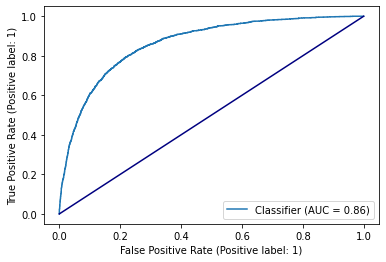

[[10141  1525]
 [  570  1159]]


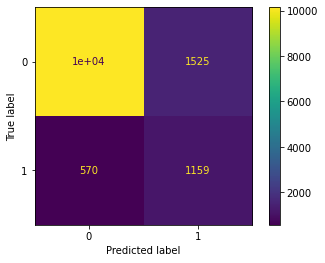

In [21]:
feat_imp_middle_lane, clf_middle_lane = ball_gain_prediction.main(clf=classifier, use_k_best_features = use_stored_k_best, corr_threshold = corr_threshold, params = params,
    name_target_set = target_set_middle_lane, target_data_columns = target_data_columns, evaluation_set = "test")

# Feature Importance and Influence (Shapley-Values)

The Shapley-values show which features are most important to the model, underscoring the main messages. The positive and negative influence of the features aligns with the intuition of which features are beneficial.

In [22]:
data_dict_middle_lane = ball_gain_prediction.split_train_test_validation(final_df_target_middle_lane)

Training matches are: 003C2T, 003C2U, 003C2V, 003C2W, 003C2X, 003C2Y, 003C2Z, 003C30, 003C31, 003C32, 003C33, 003C34, 003C35, 003C36, 003C37, 003C38, 003C3A, 003C3D, 003C3E, 003C3F, 003C3G, 003C3H, 003C3I, 003C3K, 003C3M, 003C3N, 003C3O, 003C3P, 003C3R, 003C3S, 003C3T, 003C3U, 003C3V, 003C3W, 003C3X, 003C3Y, 003C40, 003C41, 003C42, 003C43, 003C44, 003C45, 003C46, 003C47, 003C48, 003C4A, 003C4B, 003C4C, 003C4D, 003C4E, 003C4F, 003C4G, 003C4H, 003C4I, 003C4J, 003C4L, 003C4M, 003C4N, 003C4O, 003C4P, 003C4Q, 003C4R, 003C4S, 003C4T, 003C4U, 003C4V, 003C4W, 003C4X, 003C4Y, 003C4Z, 003C50, 003C51, 003C52, 003C53, 003C54, 003C55, 003C57, 003C59, 003C5A
Validation matches are: 003C5C, 003C5D, 003C5F, 003C5G, 003C5I, 003C5J, 003C5K, 003C5L, 003C5M, 003C5N, 003C5Q, 003C5R, 003C5S, 003C5T, 003C5U, 003C5V, 003C5W, 003C5Y, 003C5Z, 003C60, 003C61, 003C62, 003C63, 003C64, 003C65, 003C66
Test matches are: 003C1Z, 003C21, 003C22, 003C23, 003C24, 003C25, 003C26, 003C27, 003C28, 003C29, 003C2A, 003C2B, 00

In [23]:
explainer_middle_lane = shap.Explainer(clf_middle_lane.predict, data_dict_middle_lane["x_test"].values)

In [24]:
shap_values_middle_lane = explainer_middle_lane(data_dict_middle_lane["x_test"].values)

Permutation explainer: 13396it [3:26:44,  1.08it/s]                                                                    


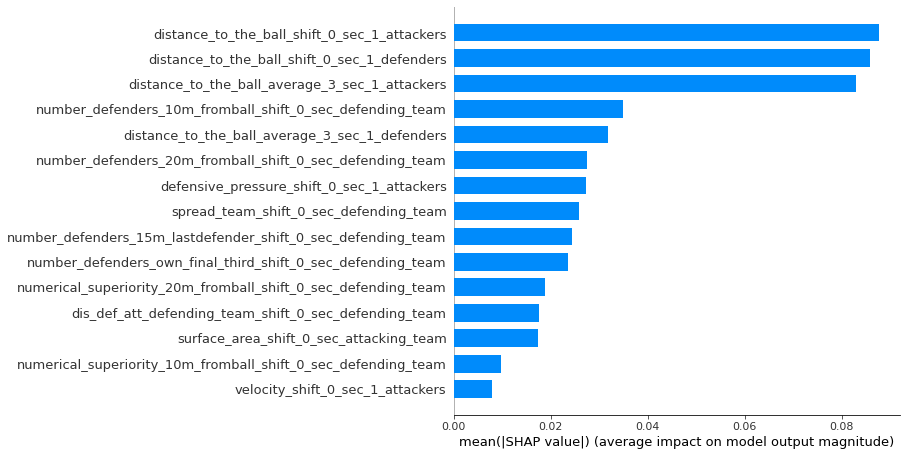

In [25]:
shap.summary_plot(shap_values_middle_lane,data_dict_middle_lane["x_test"], plot_type="bar", max_display= 50)

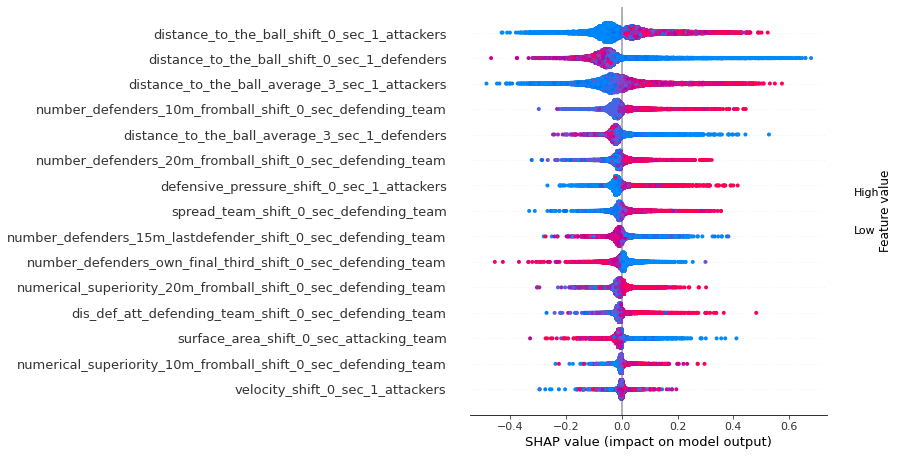

In [26]:
shap.summary_plot(shap_values_middle_lane,data_dict_middle_lane["x_test"], max_display= 50)

# Outer Lanes

In [17]:
final_df_target_outer_lanes = df_target_outer_lanes[target_data_columns]

Predicting with RandomForest and params {'max_features': 'sqrt', 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 10, 'class_weight': 'balanced', 'n_estimators': 250, 'bootstrap': False}
Training matches are: 003C2T, 003C2U, 003C2V, 003C2W, 003C2X, 003C2Y, 003C2Z, 003C30, 003C31, 003C32, 003C33, 003C34, 003C35, 003C36, 003C37, 003C38, 003C3A, 003C3D, 003C3E, 003C3F, 003C3G, 003C3H, 003C3I, 003C3K, 003C3M, 003C3N, 003C3O, 003C3P, 003C3R, 003C3S, 003C3T, 003C3U, 003C3V, 003C3W, 003C3X, 003C3Y, 003C40, 003C41, 003C42, 003C43, 003C44, 003C45, 003C46, 003C47, 003C48, 003C4A, 003C4B, 003C4C, 003C4D, 003C4E, 003C4F, 003C4G, 003C4H, 003C4I, 003C4J, 003C4L, 003C4M, 003C4N, 003C4O, 003C4P, 003C4Q, 003C4R, 003C4S, 003C4T, 003C4U, 003C4V, 003C4W, 003C4X, 003C4Y, 003C4Z, 003C50, 003C51, 003C52, 003C53, 003C54, 003C55, 003C57, 003C59, 003C5A
Validation matches are: 003C5C, 003C5D, 003C5F, 003C5G, 003C5I, 003C5J, 003C5K, 003C5L, 003C5M, 003C5N, 003C5Q, 003C5R, 003C5S, 003C5T, 003C5U, 003

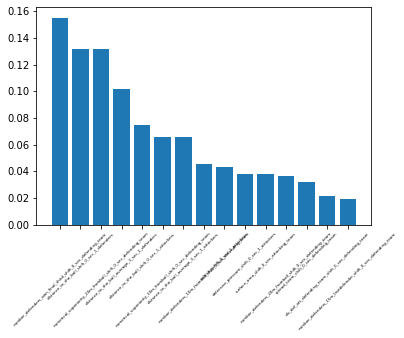

number_defenders_own_final_third_shift_0_sec_defending_team      0.155252
distance_to_the_ball_shift_0_sec_1_defenders                     0.132028
numerical_superiority_20m_fromball_shift_0_sec_defending_team    0.131655
distance_to_the_ball_average_3_sec_1_defenders                   0.101602
distance_to_the_ball_shift_0_sec_1_attackers                     0.074961
numerical_superiority_10m_fromball_shift_0_sec_defending_team    0.065589
distance_to_the_ball_average_3_sec_1_attackers                   0.065399
number_defenders_10m_fromball_shift_0_sec_defending_team         0.045321
velocity_shift_0_sec_1_attackers                                 0.043304
defensive_pressure_shift_0_sec_1_attackers                       0.037942
surface_area_shift_0_sec_attacking_team                          0.037832
number_defenders_20m_fromball_shift_0_sec_defending_team         0.036671
spread_team_shift_0_sec_defending_team                           0.031665
dis_def_att_defending_team_shift_0_sec

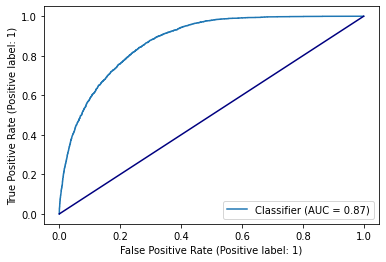

[[9580 2146]
 [ 750 2077]]


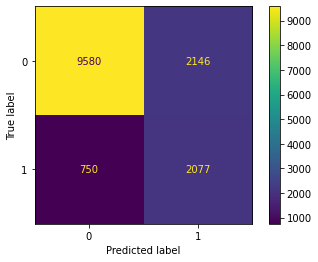

In [28]:
feat_imp_outer_lanes, clf_outer_lanes = ball_gain_prediction.main(clf=classifier, use_k_best_features = use_stored_k_best, corr_threshold = corr_threshold, params = params,
    name_target_set = target_set_outer_lanes, target_data_columns = target_data_columns, evaluation_set = "test")

# Feature Importance and Influence (Shapley-Values) of Outer Lanes

The Shapley-values show which features are most important to the model, underscoring the Main Messages. The positive and negative influence of the features aligns with the intuition of which features are beneficial.

In [29]:
data_dict_outer_lanes = ball_gain_prediction.split_train_test_validation(final_df_target_outer_lanes)

Training matches are: 003C2T, 003C2U, 003C2V, 003C2W, 003C2X, 003C2Y, 003C2Z, 003C30, 003C31, 003C32, 003C33, 003C34, 003C35, 003C36, 003C37, 003C38, 003C3A, 003C3D, 003C3E, 003C3F, 003C3G, 003C3H, 003C3I, 003C3K, 003C3M, 003C3N, 003C3O, 003C3P, 003C3R, 003C3S, 003C3T, 003C3U, 003C3V, 003C3W, 003C3X, 003C3Y, 003C40, 003C41, 003C42, 003C43, 003C44, 003C45, 003C46, 003C47, 003C48, 003C4A, 003C4B, 003C4C, 003C4D, 003C4E, 003C4F, 003C4G, 003C4H, 003C4I, 003C4J, 003C4L, 003C4M, 003C4N, 003C4O, 003C4P, 003C4Q, 003C4R, 003C4S, 003C4T, 003C4U, 003C4V, 003C4W, 003C4X, 003C4Y, 003C4Z, 003C50, 003C51, 003C52, 003C53, 003C54, 003C55, 003C57, 003C59, 003C5A
Validation matches are: 003C5C, 003C5D, 003C5F, 003C5G, 003C5I, 003C5J, 003C5K, 003C5L, 003C5M, 003C5N, 003C5Q, 003C5R, 003C5S, 003C5T, 003C5U, 003C5V, 003C5W, 003C5Y, 003C5Z, 003C60, 003C61, 003C62, 003C63, 003C64, 003C65, 003C66
Test matches are: 003C1Z, 003C21, 003C22, 003C23, 003C24, 003C25, 003C26, 003C27, 003C28, 003C29, 003C2A, 003C2B, 00

In [30]:
explainer_outer_lanes = shap.Explainer(clf_outer_lanes.predict, data_dict_outer_lanes["x_test"].values)

In [31]:
shap_values_outer_lanes = explainer_outer_lanes(data_dict_outer_lanes["x_test"].values)

Permutation explainer: 14554it [3:42:07,  1.09it/s]                                                                    


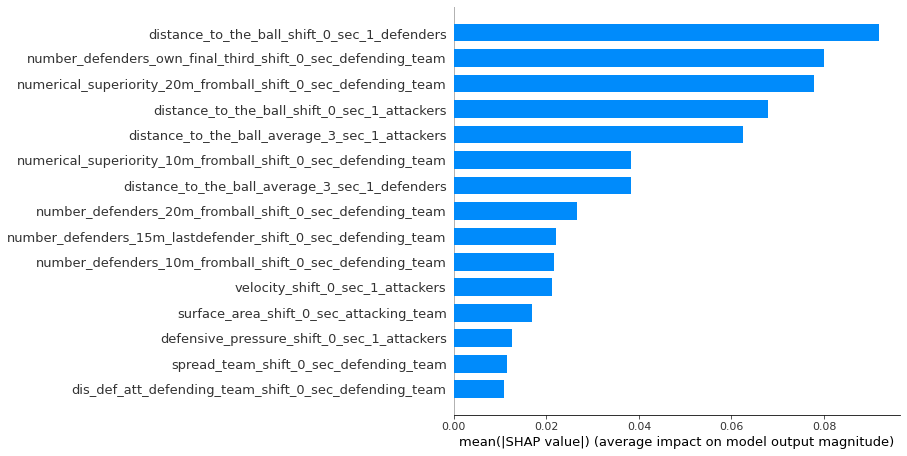

In [32]:
shap.summary_plot(shap_values_outer_lanes,data_dict_outer_lanes["x_test"], plot_type="bar", max_display= 50)

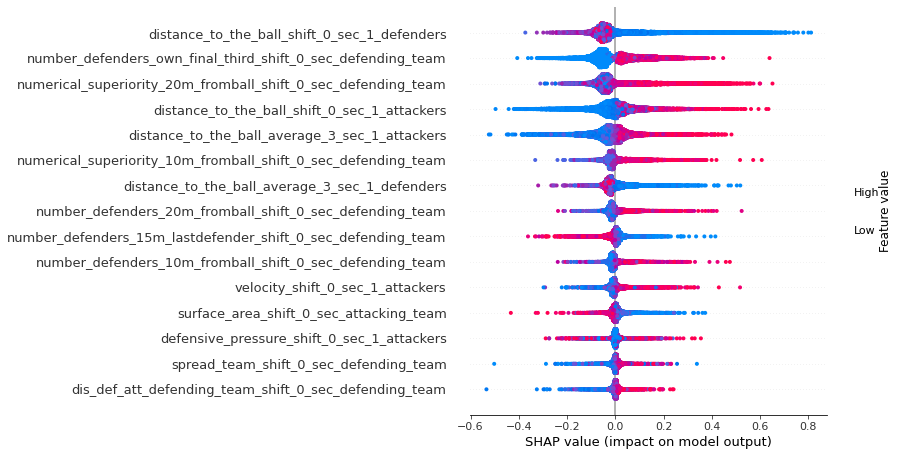

In [33]:
shap.summary_plot(shap_values_outer_lanes,data_dict_outer_lanes["x_test"], max_display= 50)

# Comparison of lanes 

Der Outer Lanes Clf hatte einen Score von training: 0.80, Test: 0.59
Evaluation des Middle Lane Clf auf dem Outer Lanes Test set
Score training: 0.8091
f1_score training: 0.4742005813953488
precision training: 0.4899874843554443
recall training: 0.4593992020652429
Score test: 0.7937
f1_score: 0.44171779141104295
precision: 0.46551724137931033
recall: 0.42023346303501946


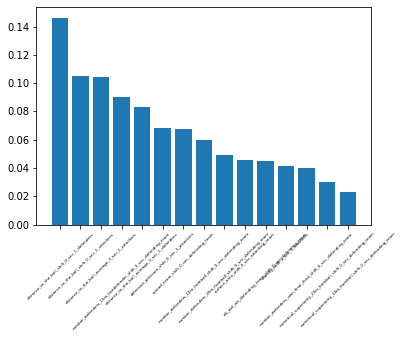

distance_to_the_ball_shift_0_sec_1_defenders                     0.146397
distance_to_the_ball_shift_0_sec_1_attackers                     0.105276
distance_to_the_ball_average_3_sec_1_attackers                   0.104483
number_defenders_15m_lastdefender_shift_0_sec_defending_team     0.090477
distance_to_the_ball_average_3_sec_1_defenders                   0.083298
defensive_pressure_shift_0_sec_1_attackers                       0.068562
spread_team_shift_0_sec_defending_team                           0.067356
number_defenders_10m_fromball_shift_0_sec_defending_team         0.060066
number_defenders_20m_fromball_shift_0_sec_defending_team         0.049282
surface_area_shift_0_sec_attacking_team                          0.045340
dis_def_att_defending_team_shift_0_sec_defending_team            0.044888
velocity_shift_0_sec_1_attackers                                 0.041305
number_defenders_own_final_third_shift_0_sec_defending_team      0.039898
numerical_superiority_20m_fromball_shi

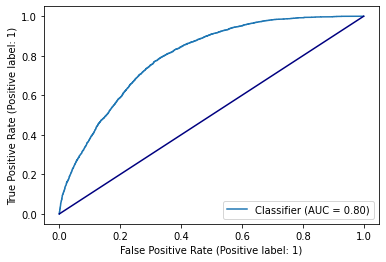

[[10362  1364]
 [ 1639  1188]]


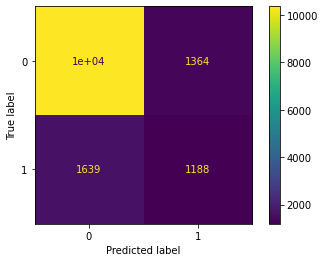

In [34]:
print("Der Outer Lanes Clf hatte einen Score von training: 0.80, Test: 0.59")
print(f"Evaluation des Middle Lane Clf auf dem Outer Lanes Test set")

f_imp_m_o_o = evaluate(clf_middle_lane, data_dict_outer_lanes["x_train"], data_dict_outer_lanes["y_train"], 
                       data_dict_outer_lanes["x_test"], data_dict_outer_lanes["y_test"], y_pred=None)


Der Middle Lanes Clf hatte einen Score von training: 0.76, Test: 0.53
Evaluation des Middle Lane Clf auf dem Outer Lanes Test set
Score training: 0.8460
f1_score training: 0.4665748318612754
precision training: 0.40075167037861914
recall training: 0.5582703121970137
Score test: 0.8396
f1_score: 0.47572578677726274
precision: 0.41139240506329117
recall: 0.5639097744360902


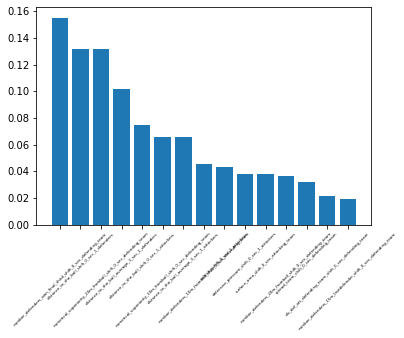

number_defenders_own_final_third_shift_0_sec_defending_team      0.155252
distance_to_the_ball_shift_0_sec_1_defenders                     0.132028
numerical_superiority_20m_fromball_shift_0_sec_defending_team    0.131655
distance_to_the_ball_average_3_sec_1_defenders                   0.101602
distance_to_the_ball_shift_0_sec_1_attackers                     0.074961
numerical_superiority_10m_fromball_shift_0_sec_defending_team    0.065589
distance_to_the_ball_average_3_sec_1_attackers                   0.065399
number_defenders_10m_fromball_shift_0_sec_defending_team         0.045321
velocity_shift_0_sec_1_attackers                                 0.043304
defensive_pressure_shift_0_sec_1_attackers                       0.037942
surface_area_shift_0_sec_attacking_team                          0.037832
number_defenders_20m_fromball_shift_0_sec_defending_team         0.036671
spread_team_shift_0_sec_defending_team                           0.031665
dis_def_att_defending_team_shift_0_sec

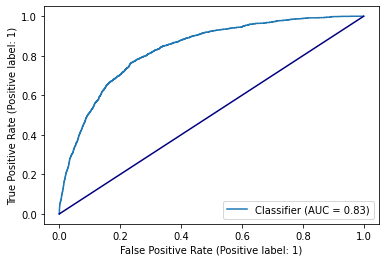

[[10271  1395]
 [  754   975]]


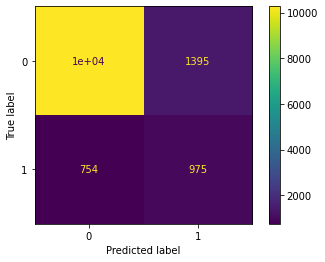

In [35]:
print("Der Middle Lanes Clf hatte einen Score von training: 0.76, Test: 0.53")
print(f"Evaluation des Middle Lane Clf auf dem Outer Lanes Test set")

f_imp_o_o_m = evaluate(clf_outer_lanes, data_dict_middle_lane["x_train"], data_dict_middle_lane["y_train"], 
                       data_dict_middle_lane["x_test"], data_dict_middle_lane["y_test"], y_pred=None)


# Comparison of shap values

In [36]:
# base set = middle_lane
# compare set = outer_lanes
shap_values_base_set = shap_values_middle_lane
data_dict_base_set = data_dict_middle_lane
shap_values_compare_set = shap_values_outer_lanes
data_dict_compare_set = data_dict_outer_lanes


In [37]:
mean_shap_vals_base = np.abs(shap_values_base_set.values).mean(0)
feat_imp_base = pd.DataFrame(list(zip(data_dict_base_set["x_test"].columns.tolist(), mean_shap_vals_base)),
                                 columns = ["feature", "feature_importance"])
feat_imp_base.sort_values("feature_importance", ascending=False, inplace=True)
feat_imp_base["rank"] = feat_imp_base["feature_importance"].rank(ascending=False)
feat_imp_base.round(2)

,feature,feature_importance,rank
0,distance_to_the_ball_shift_0_sec_1_attackers,0.09,1.0
1,distance_to_the_ball_shift_0_sec_1_defenders,0.09,2.0
13,distance_to_the_ball_average_3_sec_1_attackers,0.08,3.0
5,number_defenders_10m_fromball_shift_0_sec_defe...,0.03,4.0
14,distance_to_the_ball_average_3_sec_1_defenders,0.03,5.0
4,number_defenders_20m_fromball_shift_0_sec_defe...,0.03,6.0
12,defensive_pressure_shift_0_sec_1_attackers,0.03,7.0
10,spread_team_shift_0_sec_defending_team,0.03,8.0
7,number_defenders_15m_lastdefender_shift_0_sec_...,0.02,9.0
6,number_defenders_own_final_third_shift_0_sec_d...,0.02,10.0


In [38]:
mean_shap_vals_compare = np.abs(shap_values_compare_set.values).mean(0)
feat_imp_compare = pd.DataFrame(list(zip(data_dict_compare_set["x_test"].columns.tolist(), mean_shap_vals_compare)),
                                 columns = ["feature", "feature_importance"])
feat_imp_compare.sort_values("feature_importance", ascending=False, inplace=True)
feat_imp_compare["rank"] = feat_imp_compare["feature_importance"].rank(ascending=False)
feat_imp_compare.round(2)

,feature,feature_importance,rank
1,distance_to_the_ball_shift_0_sec_1_defenders,0.09,1.0
6,number_defenders_own_final_third_shift_0_sec_d...,0.08,2.0
2,numerical_superiority_20m_fromball_shift_0_sec...,0.08,3.0
0,distance_to_the_ball_shift_0_sec_1_attackers,0.07,4.0
13,distance_to_the_ball_average_3_sec_1_attackers,0.06,5.0
3,numerical_superiority_10m_fromball_shift_0_sec...,0.04,6.0
14,distance_to_the_ball_average_3_sec_1_defenders,0.04,7.0
4,number_defenders_20m_fromball_shift_0_sec_defe...,0.03,8.0
7,number_defenders_15m_lastdefender_shift_0_sec_...,0.02,9.0
5,number_defenders_10m_fromball_shift_0_sec_defe...,0.02,10.0


In [39]:
all_feat_imp = feat_imp_base.merge(feat_imp_compare, on = "feature", how = "outer", validate = "one_to_one",
                                  suffixes = ("_base", "_compare"))
all_feat_imp["diff_imp"] = all_feat_imp["feature_importance_base"] - all_feat_imp["feature_importance_compare"]
all_feat_imp["abs_diff_imp"] = np.abs(all_feat_imp["diff_imp"]).round(2)
all_feat_imp.sort_values("abs_diff_imp", ascending=False, inplace=True, ignore_index=True)
all_feat_imp["feat_diff_percent"] = np.where(all_feat_imp["abs_diff_imp"] > 0, 
                                            all_feat_imp["abs_diff_imp"] / ((all_feat_imp["feature_importance_base"] + all_feat_imp["feature_importance_compare"])/2),
                                            0)
all_feat_imp.round(2)

,feature,feature_importance_base,rank_base,feature_importance_compare,rank_compare,diff_imp,abs_diff_imp,feat_diff_percent
0,number_defenders_own_final_third_shift_0_sec_d...,0.02,10.0,0.08,2.0,-0.06,0.06,1.16
1,numerical_superiority_20m_fromball_shift_0_sec...,0.02,11.0,0.08,3.0,-0.06,0.06,1.24
2,numerical_superiority_10m_fromball_shift_0_sec...,0.01,14.0,0.04,6.0,-0.03,0.03,1.25
3,distance_to_the_ball_shift_0_sec_1_attackers,0.09,1.0,0.07,4.0,0.02,0.02,0.26
4,distance_to_the_ball_average_3_sec_1_attackers,0.08,3.0,0.06,5.0,0.02,0.02,0.27
5,distance_to_the_ball_shift_0_sec_1_defenders,0.09,2.0,0.09,1.0,-0.01,0.01,0.11
6,number_defenders_10m_fromball_shift_0_sec_defe...,0.03,4.0,0.02,10.0,0.01,0.01,0.35
7,distance_to_the_ball_average_3_sec_1_defenders,0.03,5.0,0.04,7.0,-0.01,0.01,0.29
8,defensive_pressure_shift_0_sec_1_attackers,0.03,7.0,0.01,13.0,0.01,0.01,0.50
9,spread_team_shift_0_sec_defending_team,0.03,8.0,0.01,14.0,0.01,0.01,0.54


In [40]:
print("Full feature names: ")
all_feat_imp["feature"].tolist()

Full feature names: 


['number_defenders_own_final_third_shift_0_sec_defending_team',
 'numerical_superiority_20m_fromball_shift_0_sec_defending_team',
 'numerical_superiority_10m_fromball_shift_0_sec_defending_team',
 'distance_to_the_ball_shift_0_sec_1_attackers',
 'distance_to_the_ball_average_3_sec_1_attackers',
 'distance_to_the_ball_shift_0_sec_1_defenders',
 'number_defenders_10m_fromball_shift_0_sec_defending_team',
 'distance_to_the_ball_average_3_sec_1_defenders',
 'defensive_pressure_shift_0_sec_1_attackers',
 'spread_team_shift_0_sec_defending_team',
 'dis_def_att_defending_team_shift_0_sec_defending_team',
 'velocity_shift_0_sec_1_attackers',
 'number_defenders_20m_fromball_shift_0_sec_defending_team',
 'number_defenders_15m_lastdefender_shift_0_sec_defending_team',
 'surface_area_shift_0_sec_attacking_team']

In [44]:
all_feat_imp["feature"] = all_feat_imp["feature"].str.replace("shift", "raw").str.replace("average", "mean")

In [46]:
# all_feat_imp.to_excel("feat_imp_diff.xlsx")

# insights of the notebooks

In [19]:
print(f"""The data on the outer and inner lanes are fundamentally different.
On the inner lane we can see ball gains after {100*round(final_df_target_middle_lane['target'].sum()/final_df_target_middle_lane['target'].count(),3)} % in the situations, 
on the outer lanes in {100*round(final_df_target_outer_lanes['target'].sum()/final_df_target_outer_lanes['target'].count(),3)} %""")

The data on the outer and inner lanes are fundamentally different.
On the inner lane we can see ball gains after 12.0 % in the situations, 
on the outer lanes in 18.9 %


This is why fundamentally different classifiers are necessary. 
This can be seen in section 6, where each CLF performs SIGNIFICANTLY worse on the other test set.

This prompts a comparison of the classifiers. The comparison shows that the outer lane clf (referred to as compare in Section 7 above)
the three features
numerical_superiority_20m_fromball_shift_0_sec_defending_team, number_defenders_own_final_third_shift_0_sec_defending_team, 
numerical_superiority_10m_fromball_shift_0_sec_defending_team 
are clearly more important. There are hardly any differences in all other features.

In [23]:
print(f""" This prompts the analysis of why this is so. Why do you need to have more defenders in your own half on the outside?
The comparison of the shap values shows that on the outer lane it is even advantageous to have defenders at the back,
but not on the inside! 
This could be due to the different composition of the data sets. On the outer lane there are 
{100 * round(df_target_outer_lanes["third_defending"].sum()/df_target_outer_lanes.shape[0],4)} % of situations in the own half, 
on the middle {100* round(df_target_middle_lane["third_defending"].sum()/df_target_middle_lane.shape[0],4)} %

Compared to the opposing half:
{round(100*df_target_outer_lanes["third_attacking"].sum()/df_target_outer_lanes.shape[0],2)} % outer lane, 
on the middle lane { round(100* df_target_middle_lane["third_attacking"].sum()/df_target_middle_lane.shape[0],2)} %

middle third:
{round(100*df_target_outer_lanes["third_middle"].sum()/df_target_outer_lanes.shape[0],2)} % outer lane, 
on the middle lane { round(100* df_target_middle_lane["third_middle"].sum()/df_target_middle_lane.shape[0],2)} %
""") 

 This prompts the analysis of why this is so. Why do you need to have more defenders in your own half on the outside?
The comparison of the shap values shows that on the outer lane it is even advantageous to have defenders at the back,
but not on the inside! 
This could be due to the different composition of the data sets. On the outer lane there are 
30.64 % of situations in the own half, 
on the middle 35.54 %

Compared to the opposing half:
31.26 % outer lane, 
on the middle lane 35.62 %

middle third:
38.11 % outer lane, 
on the middle lane 28.85 %

